In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from statsmodels.tsa.seasonal import seasonal_decompose

In [10]:
# 1. Data Overview
""" Which columns are in the dataset? 
What are their data types and shapes? 
Are there any missing values?"""

""" Answer:
What columns do you see?
Are there missing values?
How many stores and departments are there?"""

# Load the data
train_df = pd.read_csv("train.csv")
stores_df = pd.read_csv("stores.csv")
features_df = pd.read_csv("features.csv")

# Check the first few rows
print(f"\n{train_df.head()}")
print(f"\n{stores_df.head()}")
print(f"\n{features_df.head()}")


   Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  05/02/2010      24924.50      False
1      1     1  12/02/2010      46039.49       True
2      1     1  19/02/2010      41595.55      False
3      1     1  26/02/2010      19403.54      False
4      1     1  05/03/2010      21827.90      False

   Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875

   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93       2.514        NaN        NaN   
3      1  2010-02-26        46.63       2.561        NaN        NaN   
4      1  2010-03-05        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358      

In [23]:
train_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [22]:
train_df.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False
421569,45,98,2012-10-26,1076.80,False


In [11]:
print("\nTrain Data Info:")
train_df.info()

print("\nFeatures Data Info:")
features_df.info()

print("\nStores Data Info:")
stores_df.info()



Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB

Features Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3

In [12]:
# Check shape and data types
print(f"\nDataset Shape: {train_df.shape}")


Dataset Shape: (421570, 5)


In [14]:
features_df.shape[0]

8190

In [13]:
# Check for missing values
print(f"\nMissing Values: \n{train_df.isnull().sum()} ")
print(f"\nMissing Values: \n{stores_df.isnull().sum()} ")
print(f"\nMissing Values: \n{features_df.isnull().sum()} ")


Missing Values: 
Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64 

Missing Values: 
Store    0
Type     0
Size     0
dtype: int64 

Missing Values: 
Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64 


In [15]:
# Check for number of stores & dept. in each store
print(f"\nNumber of stores: \n{train_df['Store'].nunique()}")
print(f"\nNumber of departments : \n{train_df['Dept'].nunique()}")
print(f"\nDepartment in each store : \n{train_df.groupby('Store')['Dept'].nunique()}")


Number of stores: 
45

Number of departments : 
81

Department in each store : 
Store
1     77
2     78
3     72
4     78
5     72
6     77
7     76
8     76
9     73
10    77
11    78
12    75
13    79
14    77
15    79
16    76
17    76
18    78
19    79
20    78
21    77
22    76
23    77
24    77
25    77
26    76
27    78
28    77
29    77
30    64
31    76
32    77
33    63
34    78
35    74
36    63
37    62
38    63
39    75
40    77
41    77
42    62
43    61
44    62
45    74
Name: Dept, dtype: int64


In [16]:
# Merge train and stores data
merged_df = pd.merge(train_df, stores_df, on='Store')

store_dept_table = pd.pivot_table(merged_df, index='Store', columns='Dept',values='Weekly_Sales', aggfunc=np.mean)
display(store_dept_table)

Dept,1,2,3,4,5,6,7,8,9,10,...,90,91,92,93,94,95,96,97,98,99
Store,,,,,,,,,,,,,,,,,,,,,
1,22513.322937,46102.090420,13150.478042,36964.154476,24257.941119,4801.780140,24566.487413,35718.257622,28062.052238,31033.386364,...,82427.547832,64238.943427,135458.969510,71699.182378,63180.568182,120772.062168,33251.831639,35207.348811,11827.770769,306.091081
2,30777.980769,65912.922517,17476.563357,45607.666573,30555.315315,6808.382517,40477.837063,58707.369441,34375.864476,38845.854476,...,97611.537133,80610.380350,164840.230979,70581.977063,70018.672517,143588.751888,34319.063846,40697.204056,14035.400839,475.896905
3,7328.621049,16841.775664,5509.300769,8434.186503,11695.366573,2012.411818,10044.341608,8310.254196,9062.007692,10871.944126,...,1540.049161,318.685594,7568.280210,NaN,656.294444,15745.528252,3934.540000,343.437357,30.570833,NaN
4,36979.940070,93639.315385,19012.491678,56603.400140,45668.406783,8241.777692,50728.151399,62949.723776,34437.170979,37269.667413,...,89248.965524,66535.407203,159365.107902,67815.163007,68159.106573,147236.473706,38346.573077,39339.238951,15009.249371,623.182381
5,9774.553077,12317.953287,4101.085175,9860.806783,6699.202238,1191.057622,6124.484336,13735.709441,7919.805944,9783.395385,...,3059.520000,1457.221678,7759.205594,NaN,411.431486,19340.693986,5985.671119,667.070315,29.976087,NaN
6,23867.553776,50269.437273,16806.638811,34187.366503,34465.307622,7225.566643,34526.870420,47577.719790,48271.060140,47436.477902,...,53715.366084,45270.405175,99024.796503,41359.651189,41701.693497,89208.786294,30450.542238,20637.667063,9728.100629,388.636750
7,9542.801259,22603.690769,8633.536923,14950.518601,13860.350490,6329.928811,10925.757063,13970.619371,29722.736084,21136.560280,...,13858.405874,10263.880000,26530.890559,1328.178252,699.332522,34208.097273,1123.383217,4374.927902,260.886596,15.000000
8,14789.827343,35729.821748,10683.305105,21089.309301,19838.849231,3395.425455,20268.743776,26438.524336,11792.661678,20666.433776,...,39333.566154,31530.560909,60465.630000,27515.635315,25442.578042,62951.463706,16.986667,16978.366503,6880.466434,298.153714
9,11846.558252,24969.477413,7497.356783,17165.947762,19282.746014,2806.416364,13826.694336,21424.470699,13196.569720,12810.480350,...,2981.249510,869.273287,14123.063147,21.240000,599.112568,29575.050769,3596.107762,372.655556,27.930000,NaN


In [17]:
""""it is obviously seen that there are some wrong values such as there are 0 and minus values for weekly sales. 
But sales amount can not be minus. Also, it is impossible for one department not to sell anything whole week.
So, change this values."""

merged_df.loc[merged_df['Weekly_Sales']<=0]

"""1358 rows in 421570 rows means 0.3%, 
so I can delete and ignore these rows which contains wrong sales values."""

merged_df = merged_df.loc[merged_df['Weekly_Sales'] > 0]

merged_df.shape 

(420212, 7)

In [19]:
train_df['Date'] = pd.to_datetime(train_df['Date'] , dayfirst=True)

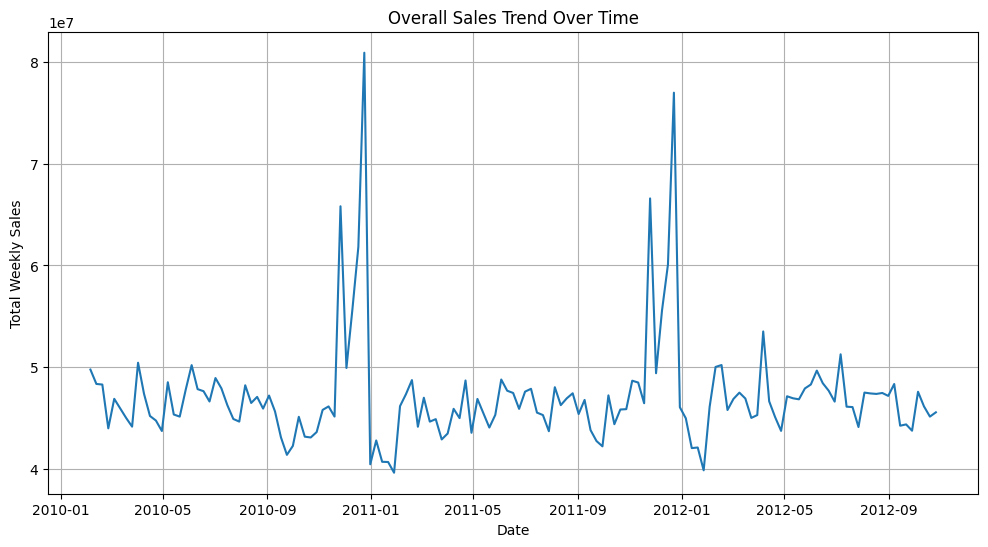

'Answer:\nDo you notice any trends or seasonality?\nAre there sharp peaks (holiday seasons)?'

In [20]:
# 2. Sales Trends & Distributions
"""What are the overall sales trends over time? 
How do sales vary across stores?"""

# Convert date to datetime format
train_df['Date'] = pd.to_datetime(train_df['Date'])

# Group sales by date
sales_trend = train_df.groupby('Date')['Weekly_Sales'].sum().reset_index()

# Plot sales over time
plt.figure(figsize=(12, 6))
plt.plot(sales_trend['Date'], sales_trend['Weekly_Sales'])
plt.xlabel('Date')
plt.ylabel('Total Weekly Sales')
plt.title('Overall Sales Trend Over Time')
plt.grid()
plt.show()

"""Answer:
Do you notice any trends or seasonality?
Are there sharp peaks (holiday seasons)?"""

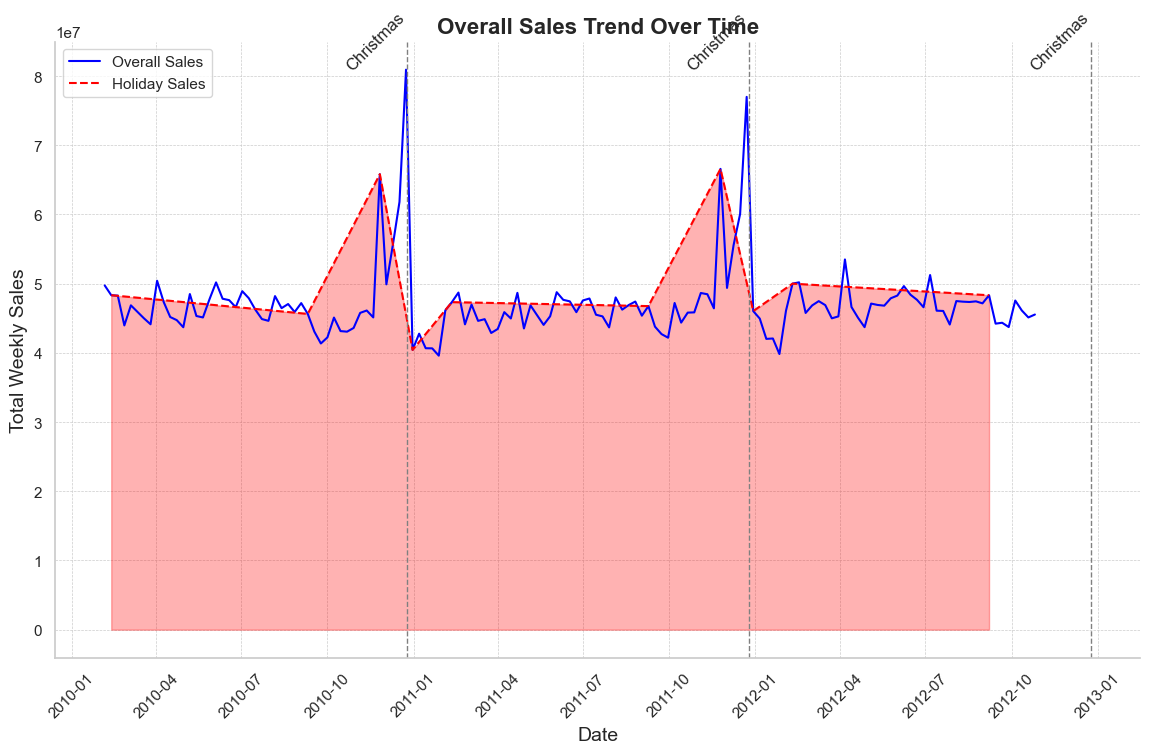

In [21]:
# Convert date to datetime format
train_df['Date'] = pd.to_datetime(train_df['Date'])

# Group sales by date
sales_trend = train_df.groupby('Date')['Weekly_Sales'].sum().reset_index()
holiday_sales_trend = train_df[train_df['IsHoliday']].groupby('Date')['Weekly_Sales'].sum().reset_index()


# Plot sales over time
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8), dpi=100)
plt.plot(sales_trend['Date'], sales_trend['Weekly_Sales'], label='Overall Sales', color='blue')
plt.plot(holiday_sales_trend['Date'], holiday_sales_trend['Weekly_Sales'], color='red', label='Holiday Sales', linestyle='--')
plt.fill_between(holiday_sales_trend['Date'], 0, holiday_sales_trend['Weekly_Sales'], color='red', alpha=0.3)

# Title and labels
plt.title('Overall Sales Trend Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Weekly Sales', fontsize=14)

# Grid and spines
plt.grid(True, linestyle='--', linewidth=0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Format x-axis
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.legend()

# Add annotations for major holidays 
major_holidays = ['2010-12-25', '2011-12-25', '2012-12-25']
for holiday in major_holidays:
    plt.axvline(pd.to_datetime(holiday), color='grey', linestyle='--', linewidth=1)
    plt.text(pd.to_datetime(holiday), max(sales_trend['Weekly_Sales']), 'Christmas', rotation=45, fontsize=12, ha='right')


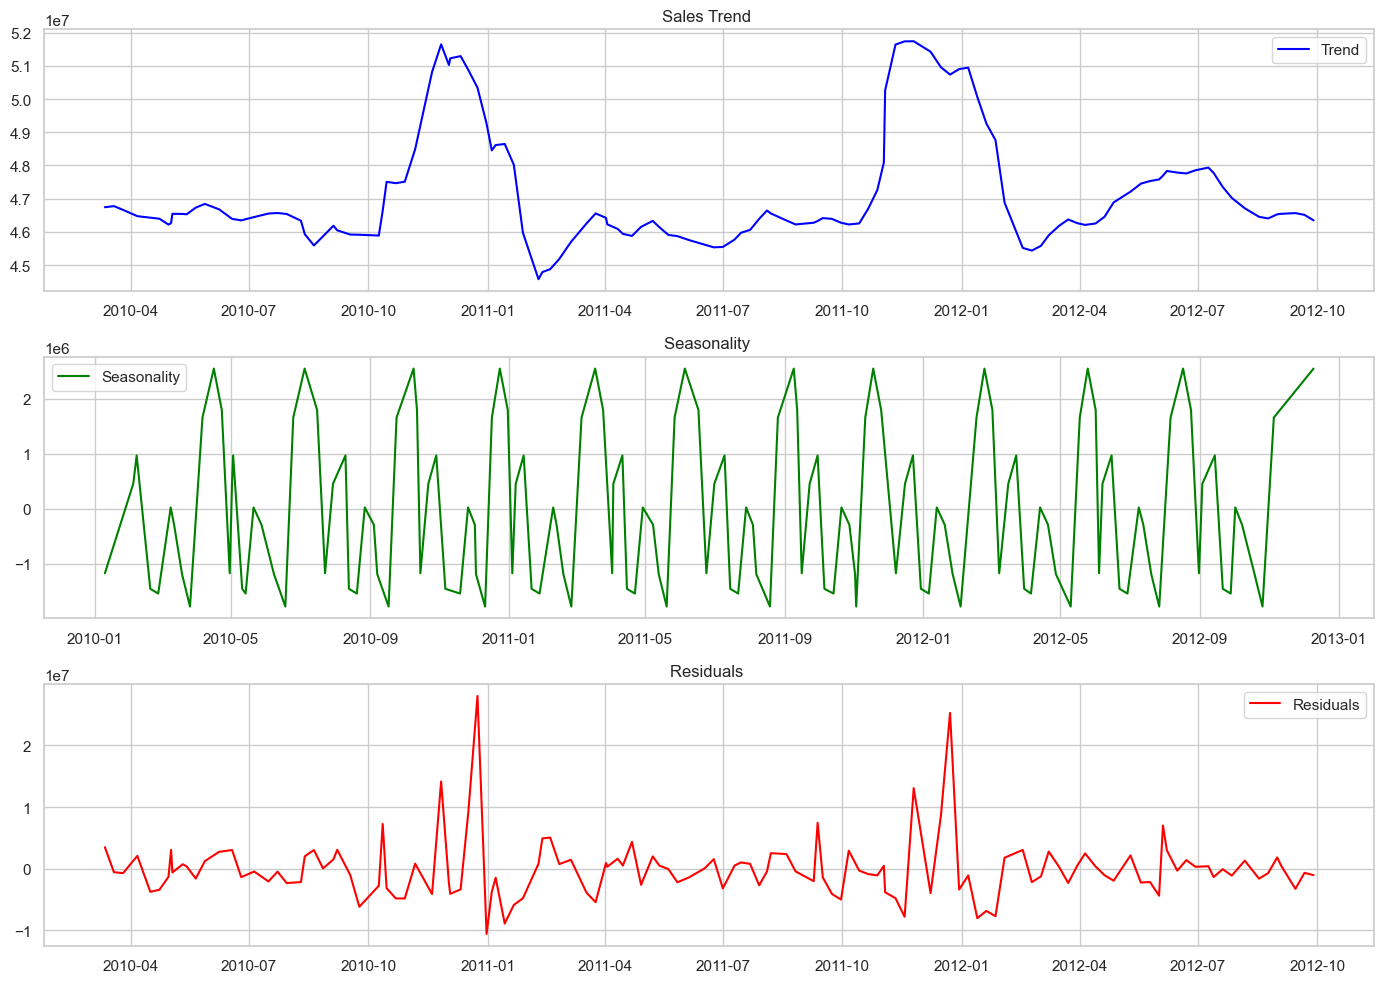

In [106]:
# Group sales by date and ensure the index is in datetime format
sales_trend = train_df.groupby('Date')['Weekly_Sales'].sum()
sales_trend.index = pd.to_datetime(sales_trend.index)

# Time series decomposition
decomposition = seasonal_decompose(sales_trend, model="additive", period=12)  
# Plot the three components: Trend, Seasonality, and Residuals
plt.figure(figsize=(14, 10))

# Sales trend
plt.subplot(3, 1, 1)
plt.plot(decomposition.trend, label="Trend", color="blue")
plt.title("Sales Trend ")
plt.legend()

# Seasonality
plt.subplot(3, 1, 2)
plt.plot(decomposition.seasonal, label="Seasonality", color="green")
plt.title("Seasonality ")
plt.legend()

# Residuals
plt.subplot(3, 1, 3)
plt.plot(decomposition.resid, label="Residuals", color="red")
plt.title("Residuals ")
plt.legend()

plt.tight_layout()
plt.show()

Top 5 Stores by Total Sales:
     Store  Weekly_Sales
19     20  3.014014e+08
3       4  2.995453e+08
13     14  2.890019e+08
12     13  2.865180e+08
1       2  2.753872e+08


' Answer:\nWhich stores perform the best?\nDoes store size influence sales?'

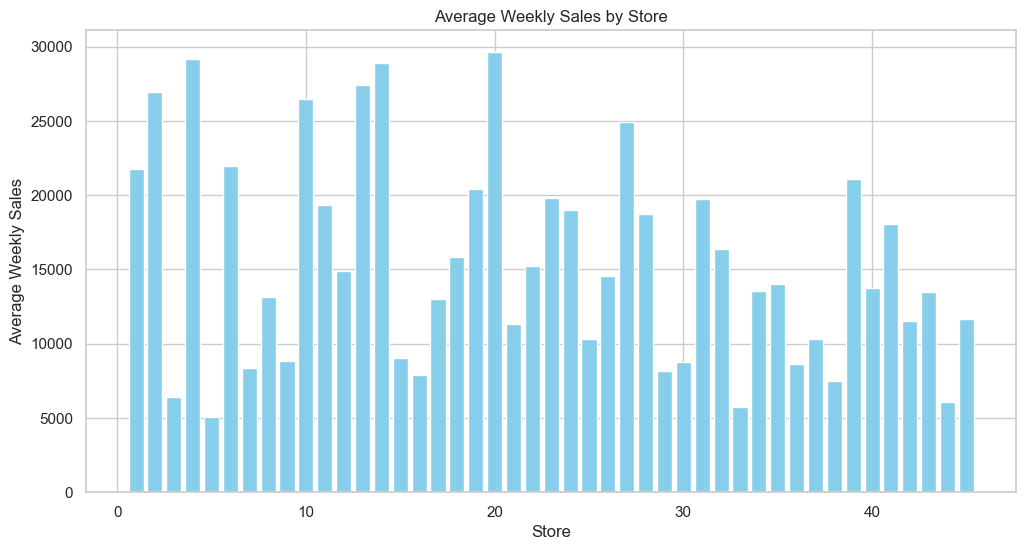

In [24]:
#  3. Store-Level Analysis
"""How do sales differ across stores? 
Are larger stores making more sales?"""

# Calculate average sales per store
store_sales = merged_df.groupby('Store')['Weekly_Sales'].mean().reset_index()

# Calculate Average sales of store according to store size
Store_size_sales = merged_df.groupby('Size')['Weekly_Sales'].mean().reset_index()

# Sort and visualize
store_sales = store_sales.sort_values(by='Weekly_Sales', ascending=False)
Store_size_sales = Store_size_sales.sort_values(by='Weekly_Sales', ascending=True)


plt.figure(figsize=(12, 6))
plt.bar(store_sales['Store'], store_sales['Weekly_Sales'], color='skyblue')
plt.xlabel('Store')
plt.ylabel('Average Weekly Sales')
plt.title('Average Weekly Sales by Store')

# Store-wise sales
store_sales = merged_df.groupby("Store")["Weekly_Sales"].sum().reset_index().sort_values("Weekly_Sales", ascending=False)
print("Top 5 Stores by Total Sales:\n", store_sales.head())

""" Answer:
Which stores perform the best?
Does store size influence sales?"""

In [29]:
max(merged_df['Size'])

219622

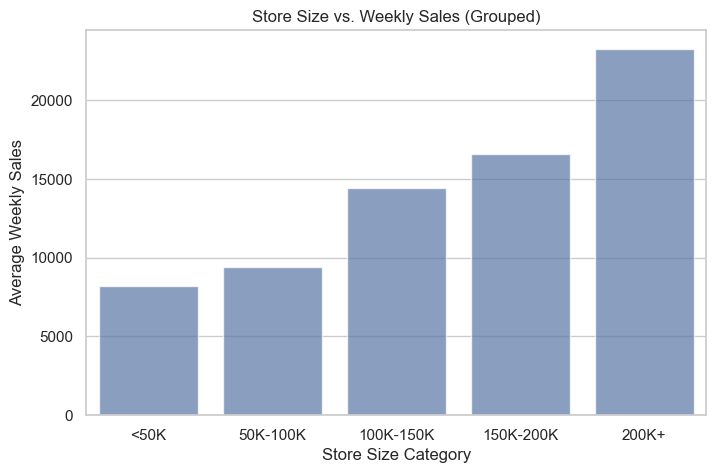

In [30]:
# Define bins and labels
bins = [0, 50000, 100000, 150000, 200000, 250000]  
labels = ["<50K", "50K-100K", "100K-150K", "150K-200K", "200K+"]

# Create a new column with bin categories
merged_df["Size_Category"] = pd.cut(merged_df["Size"], bins=bins, labels=labels)

# Aggregate sales by size category
size_sales = merged_df.groupby("Size_Category")["Weekly_Sales"].mean().reset_index()

# Plot the results
plt.figure(figsize=(8, 5))
sns.barplot(x="Size_Category", y="Weekly_Sales", data=size_sales, alpha=0.7)
plt.title("Store Size vs. Weekly Sales (Grouped)")
plt.xlabel("Store Size Category")
plt.ylabel("Average Weekly Sales")
plt.show()


In [43]:
train_df_holiday = train_df.loc[train_df['IsHoliday']==True]
train_df_holiday['Date'].unique()

<DatetimeArray>
['2010-02-12 00:00:00', '2010-09-10 00:00:00', '2010-11-26 00:00:00',
 '2010-12-31 00:00:00', '2011-02-11 00:00:00', '2011-09-09 00:00:00',
 '2011-11-25 00:00:00', '2011-12-30 00:00:00', '2012-02-10 00:00:00',
 '2012-09-07 00:00:00']
Length: 10, dtype: datetime64[ns]

In [44]:
train_df_not_holiday = train_df.loc[train_df['IsHoliday']==False]
train_df_not_holiday['Date'].nunique()

133

All holidays are not in the data. There are 4 holiday values such as;

Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13

Labor Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13

Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13

Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

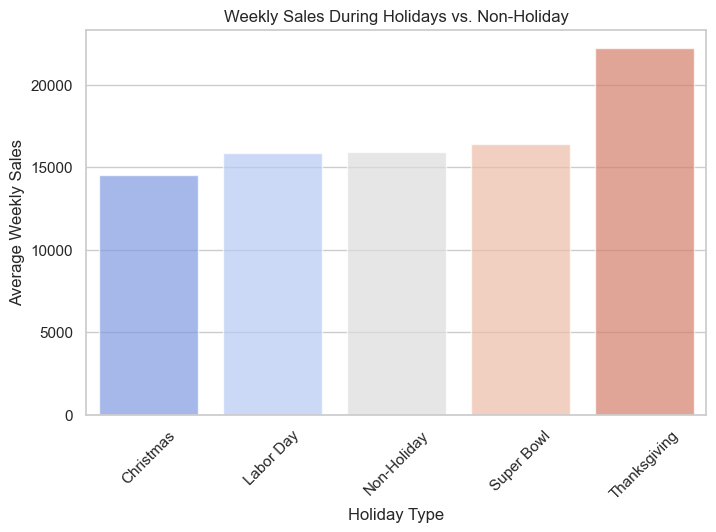

In [33]:
# Define holiday dates and labels
holiday_dates = {
    "Super Bowl": ["2010-02-12", "2011-02-11", "2012-02-10", "2013-02-08"],
    "Labor Day": ["2010-09-10", "2011-09-09", "2012-09-07", "2013-09-06"],
    "Thanksgiving": ["2010-11-26", "2011-11-25", "2012-11-23", "2013-11-29"],
    "Christmas": ["2010-12-31", "2011-12-30", "2012-12-28", "2013-12-27"]
}



# Assign holidays to a new column
def get_holiday(date):
    for holiday, dates in holiday_dates.items():
        if date.strftime("%Y-%m-%d") in dates:
            return holiday
    return "Non-Holiday"

train_df["Holiday_Type"] = train_df["Date"].apply(get_holiday)

# Group by Holiday_Type and calculate mean sales
holiday_sales = train_df.groupby("Holiday_Type")["Weekly_Sales"].mean().reset_index()

# Plot holiday vs. non-holiday sales
plt.figure(figsize=(8, 5))
sns.barplot(x="Holiday_Type", y="Weekly_Sales", data=holiday_sales, alpha=0.7, palette="coolwarm")
plt.title("Weekly Sales During Holidays vs. Non-Holiday")
plt.xlabel("Holiday Type")
plt.ylabel("Average Weekly Sales")
plt.xticks(rotation=45)
plt.show()

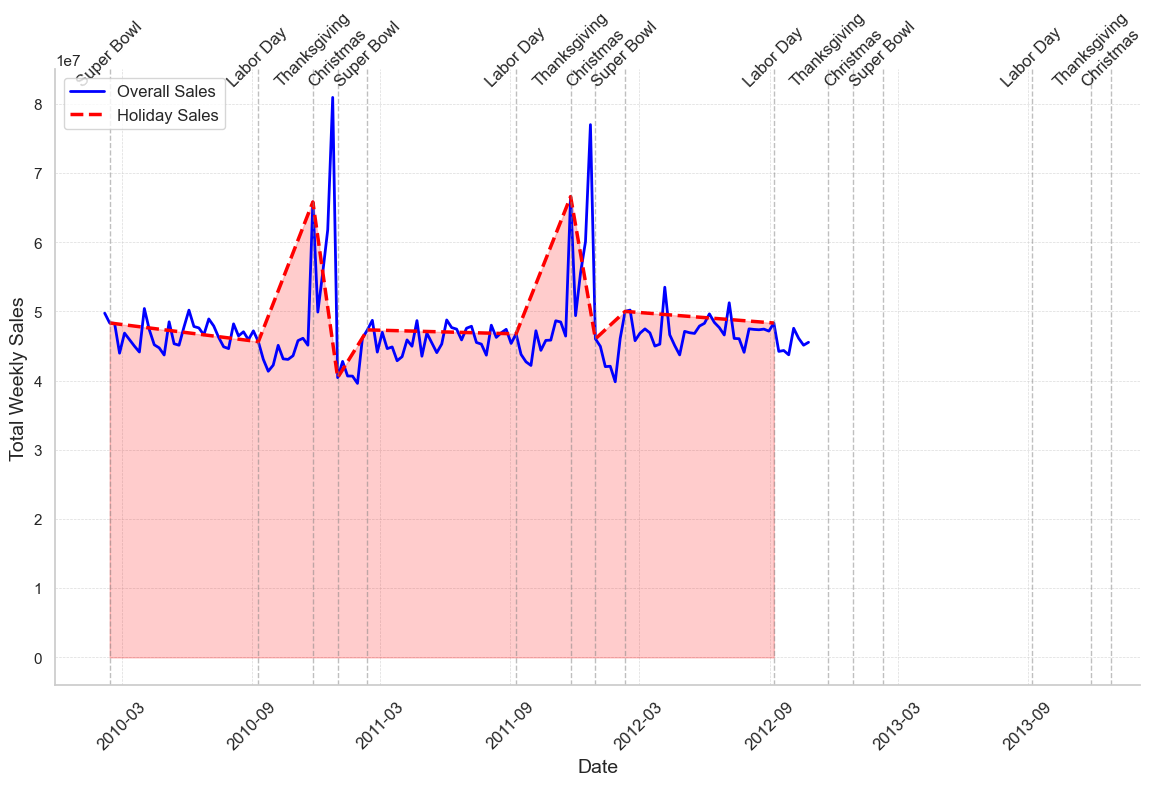

In [42]:

# Convert date to datetime format
train_df['Date'] = pd.to_datetime(train_df['Date'])

# Define holiday dates
holiday_dates = {
    "Super Bowl": ["2010-02-12", "2011-02-11", "2012-02-10", "2013-02-08"],
    "Labor Day": ["2010-09-10", "2011-09-09", "2012-09-07", "2013-09-06"],
    "Thanksgiving": ["2010-11-26", "2011-11-25", "2012-11-23", "2013-11-29"],
    "Christmas": ["2010-12-31", "2011-12-30", "2012-12-28", "2013-12-27"]
}

# Flatten dictionary values into a list
all_holidays = [date for dates in holiday_dates.values() for date in dates]

# Filter holiday sales
train_df['IsHoliday'] = train_df['Date'].astype(str).isin(all_holidays)

# Group sales by date
sales_trend = train_df.groupby('Date')['Weekly_Sales'].sum().reset_index()
holiday_sales_trend = train_df[train_df['IsHoliday']].groupby('Date')['Weekly_Sales'].sum().reset_index()

# Plot sales over time
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8), dpi=100)
plt.plot(sales_trend['Date'], sales_trend['Weekly_Sales'], label='Overall Sales', color='blue', linewidth=2)
plt.plot(holiday_sales_trend['Date'], holiday_sales_trend['Weekly_Sales'], color='red', label='Holiday Sales', linestyle='--', linewidth=2.5)
plt.fill_between(holiday_sales_trend['Date'], 0, holiday_sales_trend['Weekly_Sales'], color='red', alpha=0.2)

# Title and labels
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Weekly Sales', fontsize=14)

# Grid and spines
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Format x-axis (reduce clutter)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45, fontsize=12)

# Add vertical lines and labels for major holidays
for holiday, dates in holiday_dates.items():
    for date in dates:
        holiday_date = pd.to_datetime(date)
        plt.axvline(holiday_date, color='grey', linestyle='--', linewidth=1, alpha=0.5)
        plt.text(holiday_date, max(sales_trend['Weekly_Sales']) * 1.02, holiday, rotation=45, fontsize=12, ha='center')

# Show legend
plt.legend(fontsize=12)

# Show plot
plt.show()


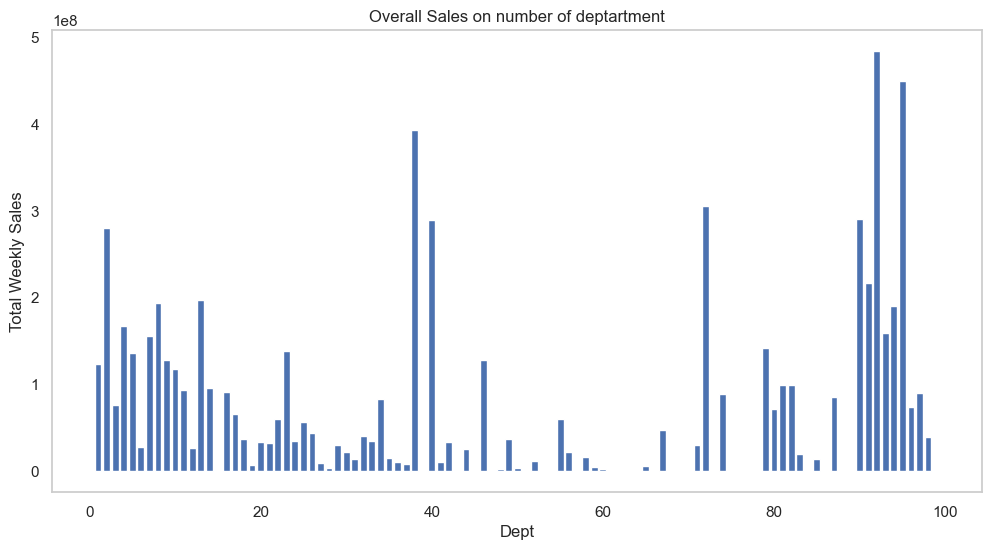

In [87]:
# Store department vs. sales
sales_dept = train_df.groupby('Dept')['Weekly_Sales'].sum().reset_index()

# Plot sales over time
plt.figure(figsize=(12, 6))
plt.bar(sales_dept['Dept'], sales_dept['Weekly_Sales'])
plt.xlabel('Dept')
plt.ylabel('Total Weekly Sales')
plt.title('Overall Sales on number of deptartment')
plt.grid()
plt.show() 

In [64]:
# Merge train and features data
features_df['Date'] = pd.to_datetime(features_df['Date'])
merged_df['Date'] = pd.to_datetime(merged_df['Date'])
full_df = pd.merge(merged_df, features_df, on=['Store', 'Date'])

full_df.drop(columns=["IsHoliday_y"], inplace=True)
full_df.rename(columns={"IsHoliday_x": "IsHoliday"}, inplace=True)
print(full_df)

        Store  Dept       Date  Weekly_Sales  IsHoliday Type    Size  \
0           1     1 2010-02-19      41595.55      False    A  151315   
1           1     2 2010-02-19      47928.89      False    A  151315   
2           1     3 2010-02-19      11523.47      False    A  151315   
3           1     4 2010-02-19      36826.95      False    A  151315   
4           1     5 2010-02-19      26468.27      False    A  151315   
...       ...   ...        ...           ...        ...  ...     ...   
282105     45    93 2012-10-26       2487.80      False    B  118221   
282106     45    94 2012-10-26       5203.31      False    B  118221   
282107     45    95 2012-10-26      56017.47      False    B  118221   
282108     45    97 2012-10-26       6817.48      False    B  118221   
282109     45    98 2012-10-26       1076.80      False    B  118221   

        Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  \
0             39.93       2.514        NaN        NaN   

              Weekly_Sales  Temperature  Fuel_Price  Unemployment
Weekly_Sales      1.000000    -0.008916   -0.003745     -0.027885
Temperature      -0.008916     1.000000    0.155546      0.097205
Fuel_Price       -0.003745     0.155546    1.000000     -0.025453
Unemployment     -0.027885     0.097205   -0.025453      1.000000


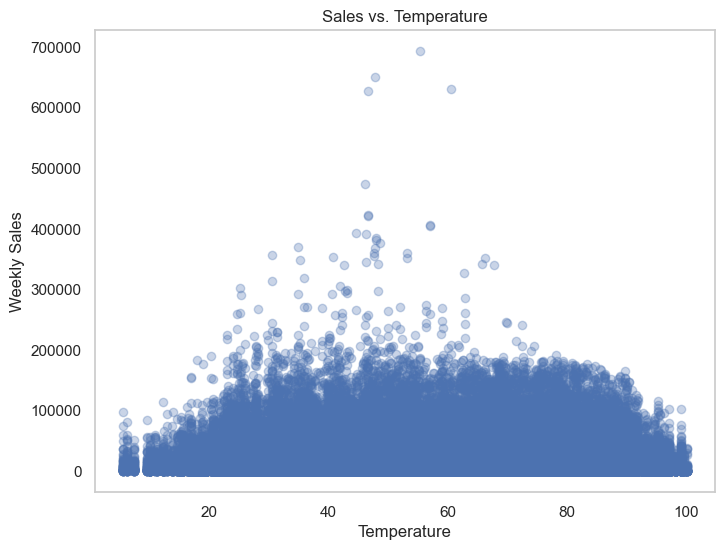

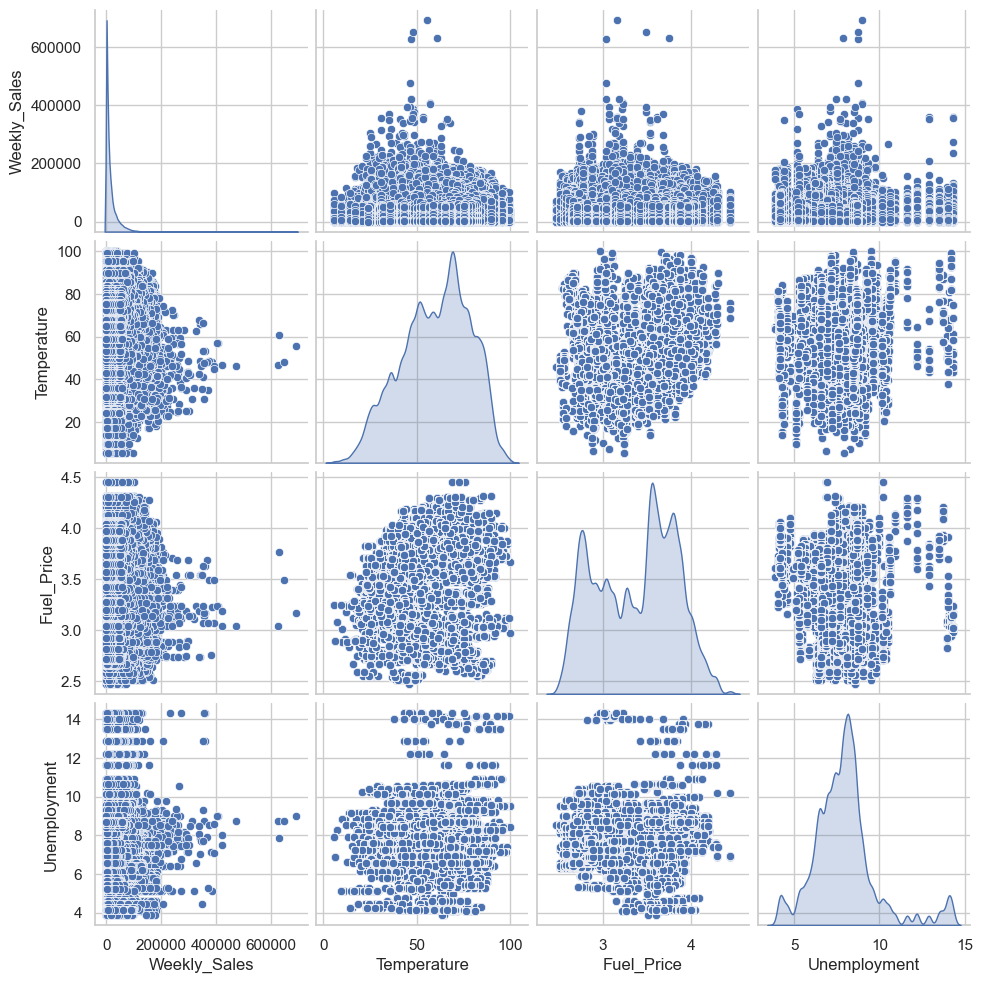

'Answer:\n\nIs there any correlation between sales and external factors?\nHow does seasonality impact sales?'

In [98]:
#   4. Feature Impact on Sales
"""How do features like temperature, fuel price, and holidays affect sales?"""

# Check correlations
correlation = full_df[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'Unemployment']].corr()
print(correlation)

# Scatter plot for sales vs. temperature
plt.figure(figsize=(8, 6))
plt.scatter(full_df['Temperature'], full_df['Weekly_Sales'], alpha=0.3)
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.title('Sales vs. Temperature')
plt.grid()
plt.show()

# Pairplot visualization
sns.pairplot(full_df[["Weekly_Sales", "Temperature", "Fuel_Price", "Unemployment"]], diag_kind="kde")
plt.show()
"""Answer:

Is there any correlation between sales and external factors?
How does seasonality impact sales?"""

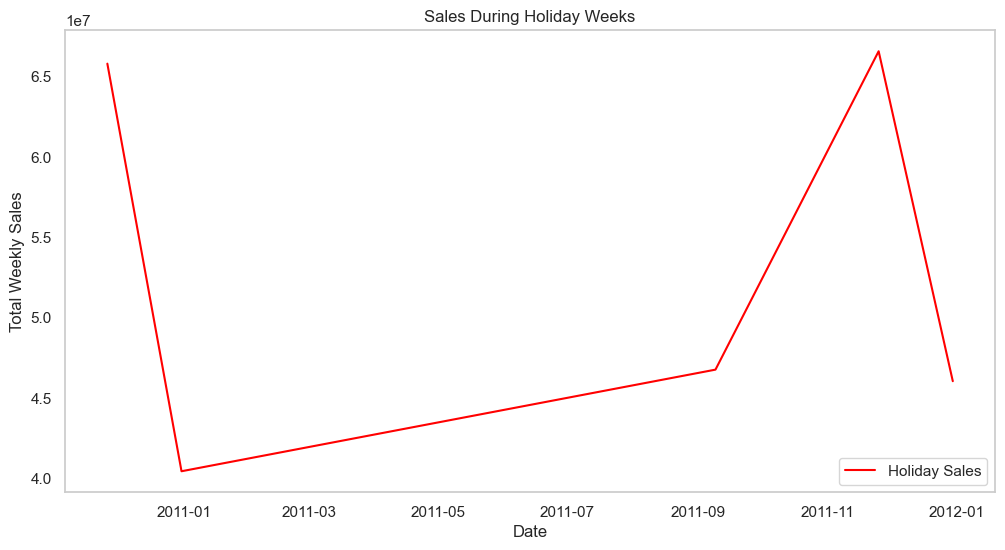

Average Sales During Holidays vs. Non-Holidays:
 IsHoliday
False    15789.665795
True     17943.792898
Name: Weekly_Sales, dtype: float64


'Answer:\n\nDo sales consistently spike on holidays?\nWhich holiday weeks have the highest sales?'

In [93]:
#  5. Holiday Sales Impact
"""Do sales spike during holidays? 
Which holidays have the biggest impact?"""

# Check sales on holidays
holiday_sales = full_df[full_df['IsHoliday'] == True].groupby('Date')['Weekly_Sales'].sum().reset_index()

# Plot holiday sales
plt.figure(figsize=(12, 6))
plt.plot(holiday_sales['Date'], holiday_sales['Weekly_Sales'], color='red', label='Holiday Sales')
plt.xlabel('Date')
plt.ylabel('Total Weekly Sales')
plt.title('Sales During Holiday Weeks')
plt.legend()
plt.grid()
plt.show()

# Check holiday impact
holiday_sales = full_df.groupby("IsHoliday")["Weekly_Sales"].mean()
print("Average Sales During Holidays vs. Non-Holidays:\n", holiday_sales)
"""Answer:

Do sales consistently spike on holidays?
Which holiday weeks have the highest sales?"""

In [46]:
train_df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Holiday_Type
0,1,1,2010-02-05,24924.50,False,Non-Holiday
1,1,1,2010-02-12,46039.49,True,Super Bowl
2,1,1,2010-02-19,41595.55,False,Non-Holiday
3,1,1,2010-02-26,19403.54,False,Non-Holiday
4,1,1,2010-03-05,21827.90,False,Non-Holiday
...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,Non-Holiday
421566,45,98,2012-10-05,628.10,False,Non-Holiday
421567,45,98,2012-10-12,1061.02,False,Non-Holiday
421568,45,98,2012-10-19,760.01,False,Non-Holiday


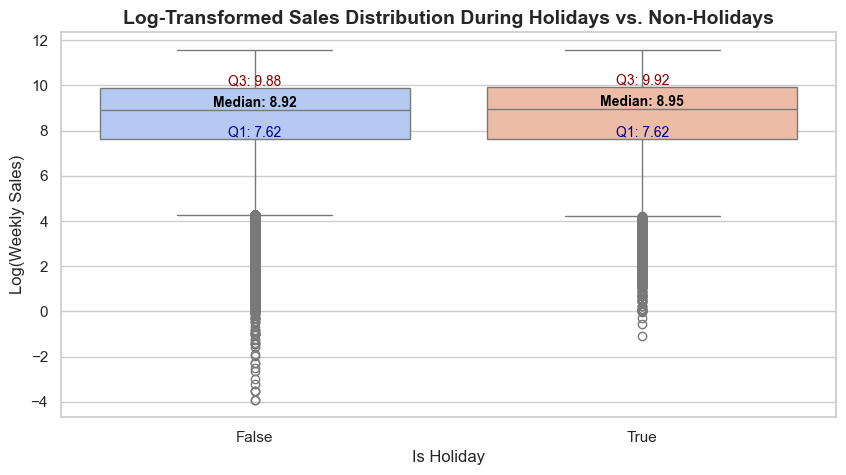

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Remove extreme outliers (top 1%)
q99 = train_df["Weekly_Sales"].quantile(0.99)
filtered_df = train_df[train_df["Weekly_Sales"] <= q99]

# Compute quartiles
stats = filtered_df.groupby("IsHoliday")["Weekly_Sales"].describe()[["25%", "50%", "75%"]]

# Create a figure
plt.figure(figsize=(10, 5))
sns.set(style="whitegrid")

# Log transformation to reduce skewness
ax = sns.boxplot(x="IsHoliday", y=np.log1p(filtered_df["Weekly_Sales"]), palette="coolwarm" , data = filtered_df)

# Titles and labels
plt.title("Log-Transformed Sales Distribution During Holidays vs. Non-Holidays", fontsize=14, fontweight='bold')
plt.xlabel("Is Holiday", fontsize=12)
plt.ylabel("Log(Weekly Sales)", fontsize=12)

# Annotate medians & quartiles
for i, is_holiday in enumerate([False, True]):
    median = np.log1p(stats.loc[is_holiday, "50%"])
    q1 = np.log1p(stats.loc[is_holiday, "25%"])
    q3 = np.log1p(stats.loc[is_holiday, "75%"])

    # Add text annotation
    ax.text(i, median, f"Median: {median:.2f}", ha='center', va='bottom', fontsize=10, fontweight="bold", color="black")
    ax.text(i, q1, f"Q1: {q1:.2f}", ha='center', va='bottom', fontsize=10, color="darkblue")
    ax.text(i, q3, f"Q3: {q3:.2f}", ha='center', va='bottom', fontsize=10, color="darkred")

# Show the plot
plt.show()


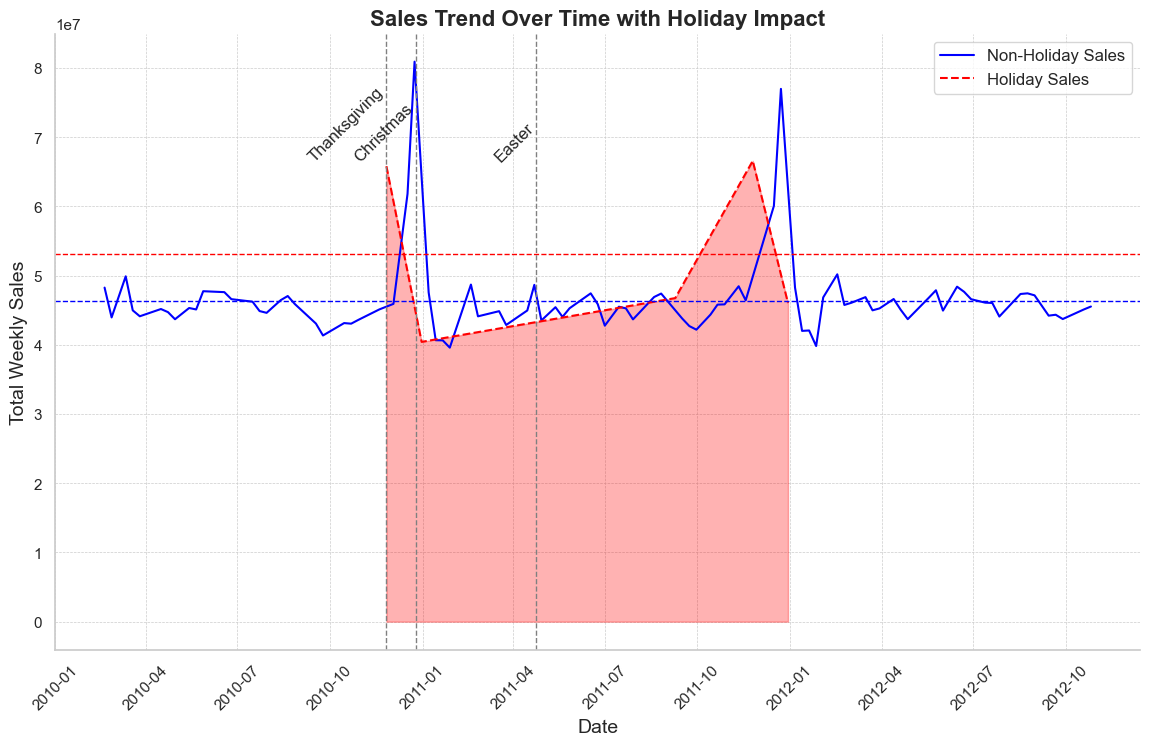

In [92]:
# Convert date to datetime format
full_df['Date'] = pd.to_datetime(full_df['Date'])

# Group sales by date and holiday status
sales_trend = full_df.groupby(['Date', 'IsHoliday'])['Weekly_Sales'].sum().reset_index()

# Split the sales data into holiday and non-holiday sales
holiday_sales = sales_trend[sales_trend['IsHoliday'] == True]
non_holiday_sales = sales_trend[sales_trend['IsHoliday'] == False]

# Calculate average sales for holidays and non-holidays
average_holiday_sales = holiday_sales['Weekly_Sales'].mean()
average_non_holiday_sales = non_holiday_sales['Weekly_Sales'].mean()

# Set Seaborn style
sns.set(style="whitegrid")

# Plot sales over time
plt.figure(figsize=(14, 8), dpi=100)

# Non-holiday sales
plt.plot(non_holiday_sales['Date'], non_holiday_sales['Weekly_Sales'], label='Non-Holiday Sales', color='blue')

# Holiday sales
plt.plot(holiday_sales['Date'], holiday_sales['Weekly_Sales'], label='Holiday Sales', color='red', linestyle='--')

# Highlight holiday weeks
plt.fill_between(holiday_sales['Date'], 0, holiday_sales['Weekly_Sales'], color='red', alpha=0.3)

# Title and labels
plt.title('Sales Trend Over Time with Holiday Impact', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Weekly Sales', fontsize=14)

# Grid and spines
plt.grid(True, linestyle='--', linewidth=0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Format x-axis
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)


plt.legend(fontsize=12)

# Add horizontal lines for average sales
plt.axhline(average_holiday_sales, color='red', linestyle='--', linewidth=1, label='Average Holiday Sales')
plt.axhline(average_non_holiday_sales, color='blue', linestyle='--', linewidth=1, label='Average Non-Holiday Sales')

# Add annotations for major holidays
major_holidays = {
    'Christmas': '2010-12-25',
    'Thanksgiving': '2010-11-26',
    'Easter': '2011-04-24'
}
for holiday, date in major_holidays.items():
    plt.axvline(pd.to_datetime(date), color='grey', linestyle='--', linewidth=1)
    plt.text(pd.to_datetime(date), max(holiday_sales['Weekly_Sales']), holiday, rotation=45, fontsize=12, ha='right')

plt.show()


In [ ]:
""" Next Steps
Deeper Visualizations: Time series decomposition, boxplots by store/department.
Outlier Detection: Are there abnormal sales spikes/drops?
Data Cleaning & Transformation: Handle missing data, create new features."""